In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
series = pd.read_csv('data_final.csv', parse_dates=[0], index_col=0)

In [8]:
series.head()

,DJI,SnP500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,MACD,...,lower_band,fourier_3,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,ARIMA_preds
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11734.32,1296.32,2414.10,756.344,13197.13,NaN,NaN,11734.32000,11734.32000,0.000000,...,NaN,13020.39374,13625.56107,14208.26577,-0.350337,0.2144,-0.9260,0.163685,0.666667,17951.59589
2008-08-11,11782.35,1305.32,2439.95,762.564,13307.96,NaN,NaN,11759.25865,11760.33625,1.077596,...,NaN,12993.55868,13571.79409,14132.88059,-0.085277,0.8156,-0.8271,0.202921,0.720000,12215.06373
2008-08-12,11642.47,1289.59,2430.61,753.948,13163.60,NaN,NaN,11717.29762,11714.33303,-2.964599,...,NaN,12966.73966,13517.88476,14057.07921,-0.318394,0.5423,-0.8591,0.374076,1.000000,12287.41573
2008-08-13,11532.96,1285.83,2428.62,752.935,13145.53,NaN,NaN,11665.76488,11657.08065,-8.684231,...,NaN,12939.93763,13463.83978,13980.88105,-0.162032,0.5106,-0.8074,0.176371,0.900000,11787.77956
2008-08-14,11615.93,1292.93,2453.67,757.509,13228.23,NaN,NaN,11654.20797,11645.90017,-8.307801,...,NaN,12913.15355,13409.66589,13904.30573,-0.194879,0.7177,-0.8689,0.319615,1.000000,12024.63278


In [15]:
data=series.iloc[:,1:]
target=series.DJI

split=.20
train_len=int(len(data)*(1-split))

In [16]:
x_train, x_test, y_train, y_test = data.iloc[:train_len,:],data.iloc[train_len:,:],target.iloc[:train_len],target.iloc[train_len:]

In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [22]:
result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 0.489988
p-value: 0.984566


In [28]:
pd.Series(y_train.values)

0       11734.32
1       11782.35
2       11642.47
3       11532.96
4       11615.93
          ...   
1586    17814.94
1587    17827.75
1588    17828.24
1589    17776.80
1590    17879.55
Length: 1591, dtype: float64

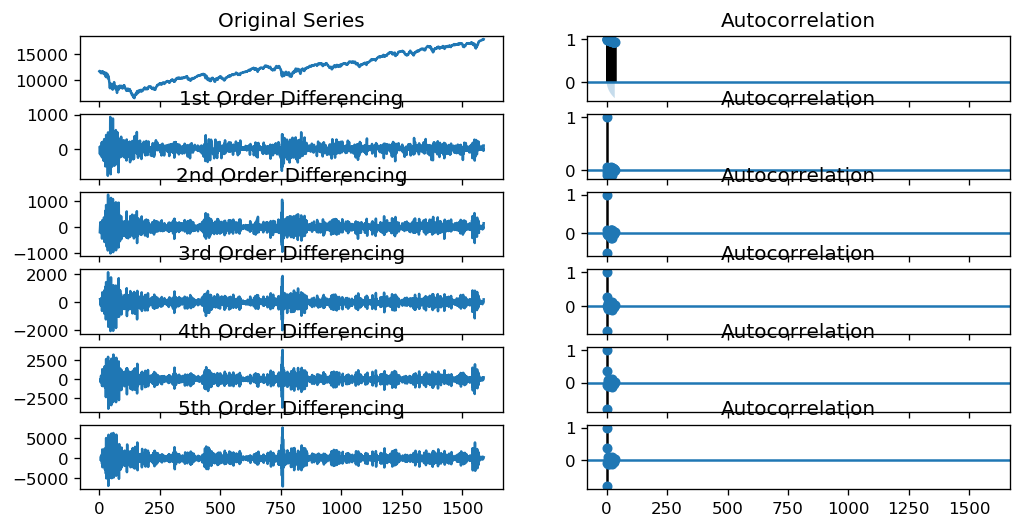

In [47]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

# Import data
df = pd.Series(y_train.values)
# Original Series
fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

# 2nd Differencing
axes[3, 0].plot(df.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.diff().diff().diff().diff().dropna(), ax=axes[3, 1])


# 2nd Differencing
axes[4, 0].plot(df.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df.diff().diff().diff().diff().diff().dropna(), ax=axes[4, 1])


# 2nd Differencing
axes[5, 0].plot(df.diff().diff().diff().diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(df.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])



plt.show()

In [48]:
from pmdarima.arima.utils import ndiffs
y = pd.Series(y_train.values)

## Adf Test
ndiffs(y, test='adf')  # 2

0

In [49]:
# KPSS test
ndiffs(y, test='kpss')  # 0

1

In [50]:
# PP test:
ndiffs(y, test='pp')  # 2

0

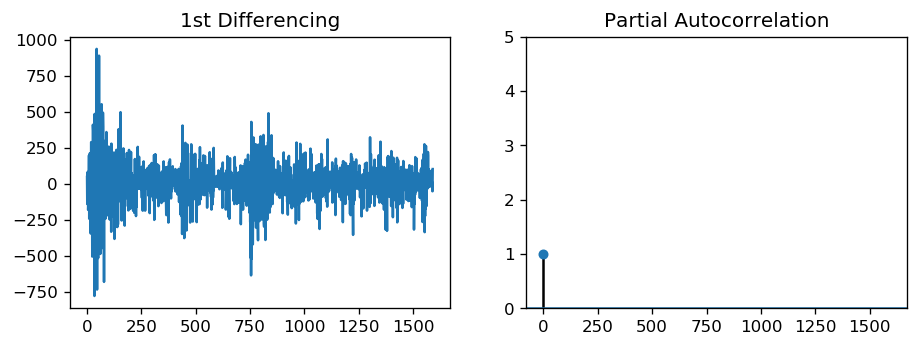

In [65]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().dropna().diff(), ax=axes[1])

plt.show()

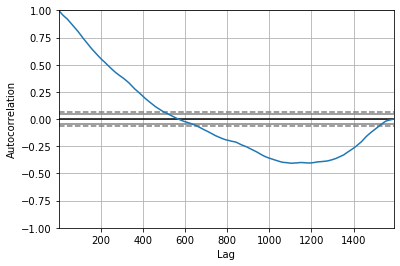

In [17]:
autocorrelation_plot(y_train)
pyplot.show()

In [18]:
model = ARIMA(y_train, order=(50,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: 

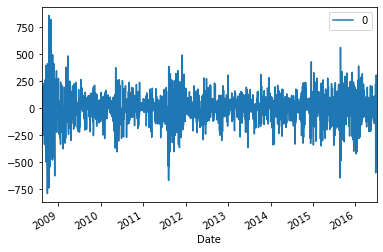

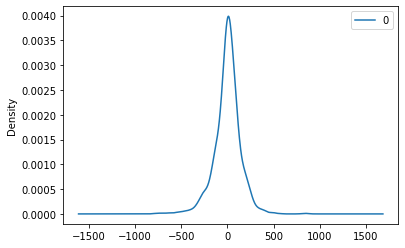

                 0
count  1988.000000
mean     -0.003104
std     142.486031
min    -787.899506
25%     -62.993557
50%       7.415486
75%      74.636356
max     858.586136


In [12]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())